# Week 2 - Probability


<hr style="border:2px solid gray">

# Outline <a id='outline'></a>
1. [Section One: Basics of Probability](#section-one-basics-of-probability)
1. [Section Two: Probability Distributions](#section-two-probability-distributions)
1. [Section Three: Monte Carlo methods of Data Generation](#section-three-monte-carlo-methods-of-data-generation)
1. [Section Four: Exercises](#section-four-exercises)

<hr style="border:2px solid gray">

## Section One: Basics of Probability [^](#outline)

This section is a recap of some basics of probability.

### What is probability?

You likely already have an intuition as to what probability means, although the fundamental mathematical formulation doesn't assign a meaning to probability, beyond three axioms developed by Kolmogorov:

* $P(X_i)$ $\geq$ 0 for all $i$
* $P(X_i \text{ or } X_j)$ = $P(X_i)$ + $P(X_j)$
* $\sum_\Omega P(X_i)$ = 1, 

where $\Omega$ denotes the set of all possible, exclusive events $X_i$ and $P(X_i)$ is the probability for $X_i$ to occur.

This axioms do not place many restrictions on probability, but to do anything particularly meaningful we need to choose a specific interpretation. You will have seen the two different interpretations used in the physical sciences before.

### Frequentist probability

**Frequentist probability** is related to the frequency with which events occur in repeated trials:

* Consider an experiment with multiple possible outcomes, where one outcome $X$ is desired
* For $N$ measurements, the desired outcome $X$ is observed $n$ times
* The probability that any single event of the $N$ events is given by the limit of the ratio

\begin{equation*}
P(X) = \lim_{N\to\infty}\frac{n}{N}
\end{equation*}

There is a clear limitation to this approach: it can only be applied when the experiment can be repeated. However, this probability is independent of any biases, so long as the outcome X is agreed to be the same between different people. 

### Bayesian probability

**Bayesian probability** abandons the concept of frequency, and instead defines probability as something that can be applied to non-repeatable experiments.

* Bayesian probability is based on *degree of belief* in some event $X$ occurring, i.e. how likely you think something is to happen
* For example, if you see betting odds that say the odds of $X$ occuring are 4:1, you might assign a probability of X occurring P(X) = 1/(1 + 4) = 1/5

An observer's estimation of Bayesian probability depends on the observer and the state of the time of observation. As we see the system change, an observer may update their value of $P(X)$ as they gain more information. In this way we can also see Bayesian probability as a statement of knowledge. Some other points of Bayesian probability:

* This is subjective; depending on what the observer knows, they might assign a different probability to an event $X$
* Can be used for events where we cannot repeat the experiment, but have some intuition or guess as to what the probability is


### Properties of probability and Bayes theorem

Here we will recap some simple properties of probability, and Bayes theorem.

For two events $A$ and $B$, we can define the probability of each event as $P(A)$ and $P(B)$ respectively. The following conditions are true:

* $P(A\text{ or }B)$ = P(A) + P(B) - P(A\text{ and }B)$
* $P(A\text{ and }B)$ = $P(A|B)P(B)$ = $P(B|A)P(A)$

where $P(A\text{ or }B)$ denotes the probability of either event $A$ or event $B$ occuring but not both, $P(A\text{ and }B)$ denotes the probability of both event $A$ and event $B$ occuring, and $P(A|B)$ refers to the conditional probability of event $A$ given event $B$. 

For two independent events $A$ and $B$, we know that $P(A|B)$ = $P(A)$. As a result, for independent $A$ and $B$:
* $P(A\text{ and }B)$ = $P(A)P(B)$







**Bayes theorem** is a very important theorem that allows us to update our estimation of probability of events. It relates the conditional probabilities for $A$ and $B$:

\begin{equation*}
P(A|B) = \frac{P(B|A)P(A)}{P(B)}
\end{equation*}

Bayesian statistics makes more particular use of this theorem, for updating belief in parameters. We can think about this in terms of **hypotheses**:

* Consider a hypothesis $H(\theta = \theta_i)$ that the parameter $\theta$ is equal to a specific value $\theta$
* In Bayesian probability, $P(\theta_i)$ represents the degree of belief in this hypothesis
* For frequentists, $\theta_i$ is not a random variable so cannot have a probability assigned to it
* Bayesian probability says we can apply Bayes theorem to this hypothesis, after making a set of observations $\mathbf{X}$ = $\{X_0, X_1, \cdots\}$; this gives us

\begin{equation*}
P(\theta_i|\mathbf{X}) = P(\mathbf{X}|\theta_i)\frac{P(\theta_i)}{P(\mathbf{X})},
\end{equation*}

where:

* $P(\mathbf{X})$ is the probability of observing the data, summed over all possible values of $\theta$. This is known as the **marginal probability** or the **evidence**.
* $P(\theta_i)$ is your initial probability for the parameter $\theta$ = $\theta_i$, the belief in your hypothesis. This is known as your **prior**.
* $P(\mathbf{X}|\theta_i)$ is the probability of measuring your data, given the parameter $\theta$ is equal to $\theta_i$. This is known as the **likelihood**. 
* $P(\theta_i|\mathbf{X})$ is the probability that $\theta$ = $\theta_i$, given the evidence $\mathbf{X}$. This is known as the **posterior**.

Bayes theorem allows us to update our belief in a given hypothesis based on evidence. You can also use it multiple times consecutively; consider a second set of observations $\mathbf{Y} = \{Y_0, Y_1, \cdots\}$. We can calculate a new posterior using Bayes theorem again:

\begin{equation*}
P(\theta_i|\mathbf{X},\mathbf{Y}) = P(\mathbf{Y}|\theta_i)\frac{P(\theta_i|\mathbf{X})}{P(\mathbf{Y})}
\end{equation*}

Here you can see we have substituted our previous posterior as our prior for this calculation. In this way we can incorporate new data into our degree of confidence in our hypothesis as we obtain more data. Later in this notebook we will use Bayes theorem to solve the famous Monty Hall problem, and compare it to a frequentist probability found by running a simulation of the game.

### Summary

In this section, we have reviewed some basics of probability, including:

* Frequentist and Bayesian interpretations
* Kolmogorov axioms
* Bayes theorem

In the following section, we will discuss different probability distributions.



<hr style="border:2px solid gray">

## Section Two: Probability Distributions



### Poisson distribution

You have likely seen the Poisson distribution before; this is a discrete probability distribution for modelling events that occur at some expected mean rate. This distribution is valid for:

* Events that occur in a fixed interval of time or space
* Events are independent of the time since the previous event

Probability for a given number of events $k$, with a mean rate $\lambda$, is given by

\begin{equation*}
f(k; \lambda) = \frac{\lambda^ke^{-\lambda}}{k!}
\end{equation*}

The Poisson distribution is implemented in `scipy.stats`, so it is easy to visualise the probability as a function of $k$ for a given $\lambda$, and the CDF:

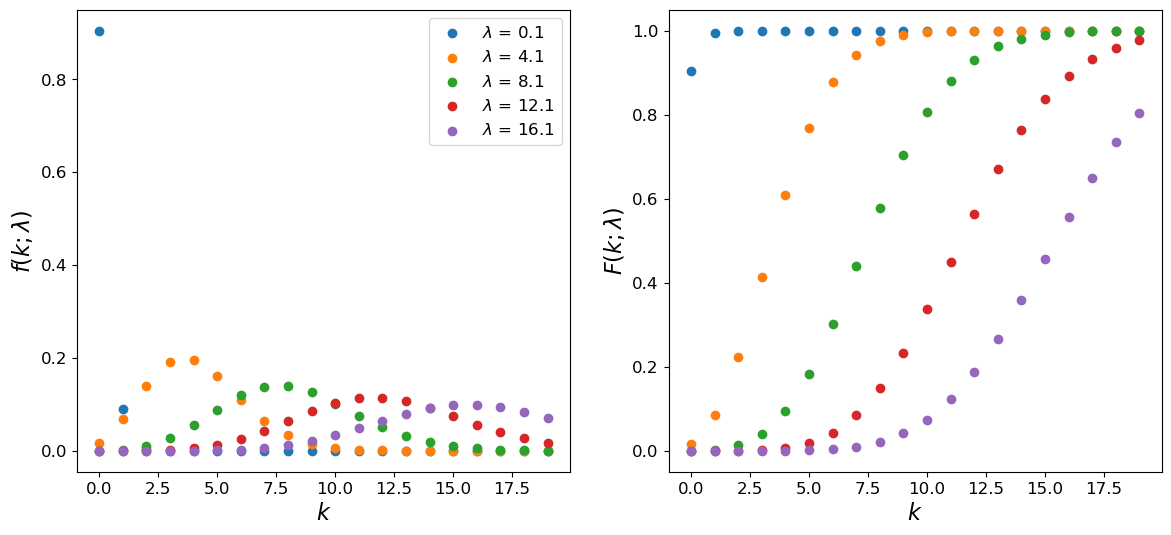

In [2]:
from scipy.stats import poisson
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0,20)
lambdas = np.arange(0.1,20,4.0)

fig, axs = plt.subplots(1,2,figsize = (14,6))
[axs[0].scatter(x,poisson.pmf(x,i),label='$\lambda$ = {:.1f}'.format(i)) for i in lambdas]
[axs[1].scatter(x,poisson.cdf(x,i),label='$\lambda$ = {:.1f}'.format(i)) for i in lambdas]

axs[0].set_xlabel('$k$',fontsize = 16)
axs[1].set_xlabel('$k$', fontsize = 16)
axs[0].set_ylabel('$f(k;\lambda)$',fontsize = 16)
axs[1].set_ylabel('$F(k;\lambda)$',fontsize = 16)
axs[0].tick_params(labelsize = 12)
axs[1].tick_params(labelsize = 12)

axs[0].legend(loc='upper right',fontsize = 12)

### Normal distribution



The normal distribution, or Gaussian distribution, is a distribution you will be familiar with and very useful in general. In fact, a theorem known as the **central limit theorem** states that for any ensemble of $N$ random variables, the total distribution tends to a normal distribution.

For a continuous random variable $X$ distributed according to a Normal distribution $\Phi(\mu,\sigma)$, the probability density function is given as

\begin{equation*}
f(X; \mu, \sigma) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}\left(\frac{X - \mu}{\sigma}\right)^2}
\end{equation*}

Again `scipy.stats` defines the PDF and CDF for a normal distribution, that you can access easily:

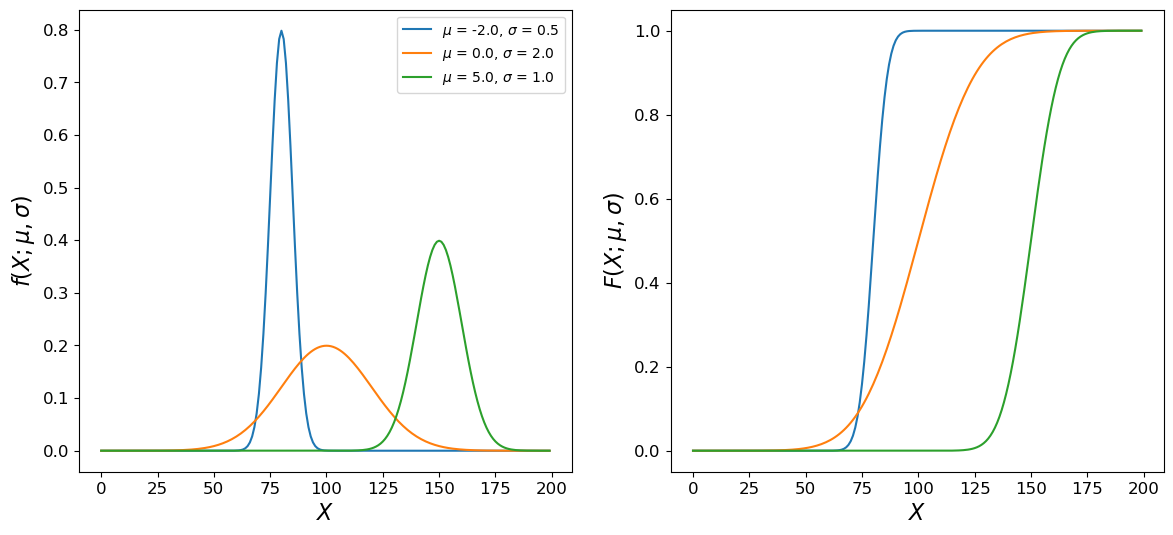

In [3]:
from scipy.stats import norm

x = np.arange(-10,10,0.1)
mu_range = [-2,0,5]
sig_range = [0.5,2,1]

fig, axs = plt.subplots(1,2,figsize = (14,6))
[axs[0].plot(norm.pdf(x,m,s),label = '$\mu$ = {:.1f}, $\sigma$ = {:.1f}'.format(m,s)) for m, s in zip(mu_range,sig_range)]
[axs[1].plot(norm.cdf(x,m,s),label = '$\mu$ = {:.1f}, $\sigma$ = {:.1f}'.format(m,s)) for m, s in zip(mu_range,sig_range)]

axs[0].set_xlabel('$X$',fontsize = 16)
axs[0].set_ylabel('$f(X;\mu,\sigma)$',fontsize = 16)
axs[1].set_xlabel('$X$',fontsize = 16)
axs[1].set_ylabel('$F(X;\mu,\sigma)$',fontsize = 16)
axs[0].tick_params(labelsize = 12)
axs[1].tick_params(labelsize = 12)

axs[0].legend(loc='upper right')

A normal distribution with $\mu$ = 0 and $\sigma$ = 1 is referred to as a **standard normal distribution**. 

<div style="background-color:#FFCCCB">

### Central limit theorem

### $\chi^2$ distribution



Mostly commonly used in goodness-of-fit testing, the $\chi^2$ distribution is a very important distribution that is related to the normal distribution. In fact, the square of a standard normally distributed random variable is distributed according to the $\chi^2$ distribution, with 1 **degree of freedom**. 

A random variable $X$ distributed according to a a $\chi^2$ distribution with one degree of freedom can be denoted as $X \sim \chi^2(1)$. The PDF of this distribution can then be written as

\begin{equation*}
f(X; 1) = \frac{1}{\sqrt{2\pi X}}e^{-\frac{X}{2}}
\end{equation*}

In general, for $N$ independent, standard normal variables {$Z_1$, $\cdots$, $Z_N$}:

* Define sum of squares $Q = \sum_{i = 1}^N Z_i^2$
* Q is distributed according to a $\chi^2$ distribution with $N$ degrees of freedom, $Q \sim \chi^2(k)$

Once again `scipy.stats` has a good implementation of the $\chi^2$ distribution, for any number of degrees of freedom.

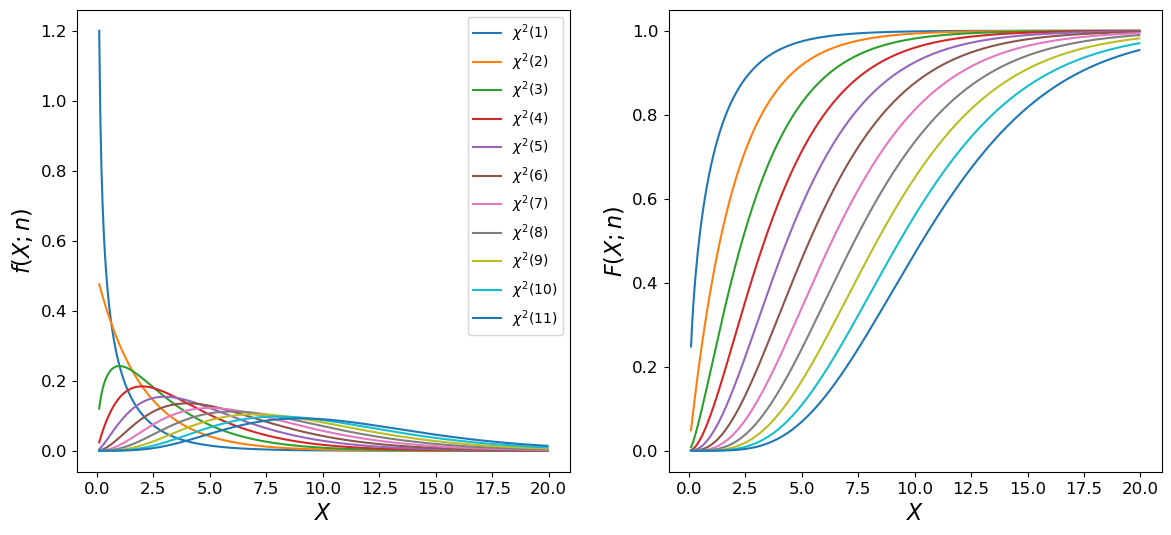

In [4]:
from scipy.stats import chi2

x = np.arange(0.1,20,0.05)
ndof = range(1,12,1)

# plotting
fig, axs = plt.subplots(1,2,figsize=(14,6))

[ axs[0].plot(x,chi2.pdf(x,i),label="$\chi^{2}(%d)$"%i) for i in ndof ]
[ axs[1].plot(x,chi2.cdf(x,i),label="$\chi^{2}(%d)$"%i) for i in ndof ]

axs[0].set_xlabel("$X$",fontsize = 16)
axs[0].set_ylabel("$f(X;n)$",fontsize = 16)
axs[1].set_xlabel("$X$",fontsize = 16)
axs[1].set_ylabel("$F(X;n)$",fontsize = 16)
axs[0].tick_params(labelsize = 12)
axs[1].tick_params(labelsize = 12)

axs[0].legend()


You will see next week how this distribution relates to the $\chi^2$ test for goodness of fit.

<div style="background-color:#C2F5DD">

### Example

Using `np.random.normal`, generate normally distributed data and plot a histogram. Try varying the $\mu$ and $\sigma$ of the Gaussian, as well as the number of points you generate, to convince yourself that the generated data obeys the distribution. 

In [5]:
# Define Gaussian parameters

mu = 0
sigma = 0.5
size = 500

In [6]:
# Generate data

import numpy as np

X = np.random.normal(loc = mu, scale = sigma, size = size)


(array([  6.,  21.,  43.,  83., 126.,  82.,  81.,  41.,  11.,   6.]),
 array([-1.37801094, -1.09379588, -0.80958081, -0.52536574, -0.24115068,
         0.04306439,  0.32727945,  0.61149452,  0.89570959,  1.17992465,
         1.46413972]),
 <BarContainer object of 10 artists>)

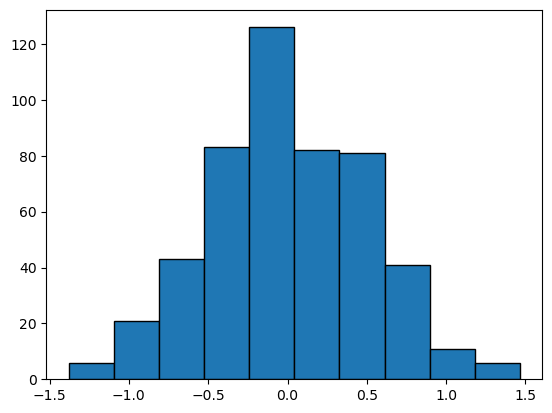

In [7]:
# Plot histogram

import matplotlib.pyplot as plt

plt.hist(X,bins = 10, edgecolor='black')

<hr style="border:2px solid gray">

## Section Three: Monte Carlo methods of data generation



Often you will need to simulate data distributions from experiments or theories to then compare with real data. This is called the **Monte Carlo Technique** and is a form of integration. This is often used for functions that are difficult to integrate or invert, however we will start with a more well behaved example. 


### Inverse transform [^](#index) <a id='inverse'></a>

The mathematics given below shows that fundamental ideas behind generating the required random distribution, however the exact method is only applicable for integrable, invertable functions

Let us say we want to generate a random distribution, $x$, such that it has a given **probability distribution function** (pdf), $f(x)$ in the range $-\infty \le x \le \infty$. We can calculate the **cumulative distribution** up to a point $a$ using our pdf with the following integral:

\begin{equation}    
    F(a) =  \int_{-\infty}^a f(x) dx
\end{equation}  

$F(a)$ is thus itself a random variable distribution, and we will set it to have **uniform probability**. This the allows us to invert the above calculation and generate the distribution we desire.

This becomes much easier to understand through a concrete example:

Let us say we want to generate a distribution that has a pdf of $x^2$ for $ -2 \le x \lt 2$. We can then write the cumulative distribution, u, as:

$u=F(x') = \int_{-2}^{x'} x^2 dx = \left[ \dfrac{x^3}{3} \right]_{-2}^{x'}$

This will be a uniform function between $-\dfrac{8}{3}$ and $\dfrac{8}{3}$. If it is possible to invert this (as in this case), we can then apply the inversion to a random number with range $ -\frac{8}{3} \le x \lt \frac{8}{3}$ to get the desired pdf. i.e. if :

$u=F(x)$

then:

$x=F^{-1}(u)$

In this case:

$F^{-1}(u)= \sqrt[3]{3u}$ between $-\dfrac{8}{3} \le u \le \dfrac{8}{3}$

Let's see what this looks like as code:


1.9984701488897976 -1.9995771537488536


(array([21., 13., 16., 16., 17., 10.,  9., 12., 18.,  9., 14.,  8., 12.,
        12.,  6.,  8.,  8.,  9., 12., 12., 11.,  7., 10.,  6.,  9.,  9.,
         9.,  8.,  9.,  6.,  6.,  8.,  8., 10.,  3.,  6.,  5.,  4.,  5.,
         4.,  6.,  4.,  3.,  6.,  4.,  5.,  4.,  4.,  3.,  2.,  6.,  5.,
         3.,  7.,  2.,  5.,  3.,  3.,  3.,  4.,  0.,  1.,  2.,  3.,  2.,
         1.,  2.,  2.,  0.,  1.,  3.,  0.,  0.,  0.,  1.,  0.,  3.,  1.,
         1.,  3.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,
         0.,  0.,  0.,  1.,  2.,  3.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,
         1.,  1.,  2.,  2.,  0.,  3.,  2.,  3.,  2.,  1.,  6.,  2.,  3.,
         3.,  2.,  4.,  3.,  5.,  6.,  1.,  1.,  6.,  5.,  2.,  2.,  4.,
         7.,  7.,  7.,  4., 10.,  4.,  3.,  6.,  2.,  8.,  5.,  5.,  5.,
         6.,  7.,  1., 11., 14.,  8., 10.,  8., 16.

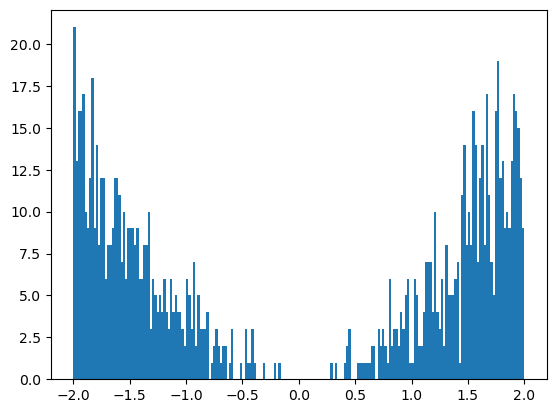

In [13]:
import scipy.interpolate as spi

def inv(u):
    return np.cbrt(3*u)

x=[]

nr=1000

for i in range(nr):
    u=np.random.uniform(low=-8./3., high=8./3.) 
    x.append(inv(u))
    
    
x=np.array(x)
print(x.max(), x.min())
plt.hist(x,bins=200)
    


### Numerical Inverse Transform [^](#index) <a id='numerical'></a>


The function that you have may be difficult to either integrate or invert. Howevever, provided you can calculate the function numerically, you can also **integrate it numerically** by summing the entries in the numpy array. This is done by setting the integral (i.e. sum) equal to 1, and then sampling between 0 and 1. We then need to interpolate between the steps in the integration, either linearly or with a cubic spline.

Once again, we will use a pdf of $x^2$ as our example:


1.0


(array([1.5041e+04, 1.4528e+04, 1.4138e+04, 1.4192e+04, 1.3683e+04,
        1.3295e+04, 1.3134e+04, 1.2765e+04, 1.2568e+04, 1.2142e+04,
        1.2058e+04, 1.1726e+04, 1.1633e+04, 1.1164e+04, 1.1026e+04,
        1.0728e+04, 1.0449e+04, 1.0152e+04, 9.9210e+03, 9.6840e+03,
        9.5250e+03, 9.3400e+03, 9.0450e+03, 8.9220e+03, 8.4230e+03,
        8.1860e+03, 8.1260e+03, 8.0390e+03, 7.6780e+03, 7.4450e+03,
        7.3700e+03, 6.9540e+03, 6.8060e+03, 6.5800e+03, 6.4910e+03,
        6.2690e+03, 6.0530e+03, 5.6790e+03, 5.7140e+03, 5.5160e+03,
        5.3110e+03, 5.0990e+03, 4.9440e+03, 4.8810e+03, 4.4990e+03,
        4.3840e+03, 4.3350e+03, 4.1170e+03, 3.9230e+03, 3.9390e+03,
        3.7730e+03, 3.4910e+03, 3.3310e+03, 3.2180e+03, 3.1560e+03,
        2.9110e+03, 2.8240e+03, 2.7610e+03, 2.5660e+03, 2.4560e+03,
        2.3380e+03, 2.2260e+03, 2.1260e+03, 2.0200e+03, 1.9760e+03,
        1.8060e+03, 1.6530e+03, 1.5710e+03, 1.5170e+03, 1.3850e+03,
        1.3530e+03, 1.1960e+03, 1.1300e+03, 1.04

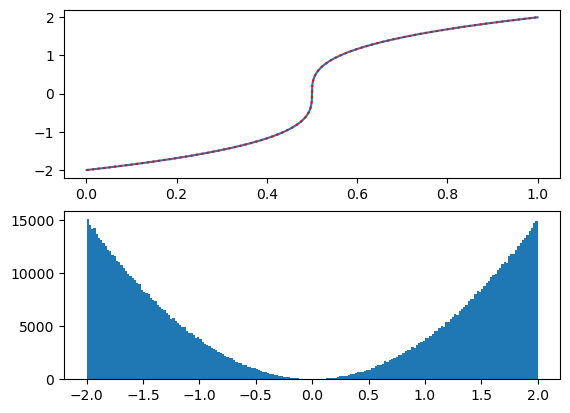

In [12]:
x=np.arange(-2,2,0.0011) 
# step deliberately chosen so as to not exactly hit 0 
# splines don't like no change so avoid exactly zero

xsq=x*x
y=xsq.cumsum()

y=y/y[-1] #normalising the cumulative sum

print(y[-1])

# Now if we choose a value of x between 0 and 1, we can map it to a value between -2 and 2
# we will need to interpolate - one way of doing this is with a cubic spline


f = spi.CubicSpline(y,x) 
# This version allows f to be valid outside of the spline - which is useful here
# f is our approximation of the integral

# check if the spline is any  good
fig = plt.figure()

ax = fig.add_subplot(2,1,1)
ax.plot(y,x)
ax.plot(y,f(y),"r:")

yr=np.random.uniform(size=1000000)
xr=f(yr)

ax2 = fig.add_subplot(2,1,2)
ax2.hist(xr,bins=200)



In [ ]:

<hr style="border:2px solid gray">

# The Accept-Reject Method [^](#index) <a id='accept-reject'></a>

If the pdf, $f(x)$, is too complicated even to invert numerically, then we can always use the accept/reject mechanism.

First, we generate a random number, $x$ in our desired range ($-2 \le x \le 2$) from a random uniform distribution, and then generate a second number,y, from the uniform distribution $h(y)$. The code below will display a graph of both these distributions.

If $y \le f(x)$, then we keep point x; otherwise it is rejected.

Many textbooks will tell you to normalise $f(x)$ and $h(y)$. However this is not needed if the numbers are scaled appropriately.
pl.rcParams['figure.figsize'] = [10, 10] 

def f(x): # the pdf that you want to generate
    return -x**2+4 # note only valid between +/- 2 as otherwise would be negative

x=np.arange(-2,2,0.001)
y=f(x)

pl.plot(x,y,label="Desired pdf $f(x)$")
pl.plot([-2.2,2.2],[0,0], "k")
pl.plot([-2,-2,2,2],[0,4,4,0],"k:",label="Envelope function $h(x)$")
pl.xlabel("x")
pl.ylabel("y")
pl.legend()
pl.show()
This approach is very inefficient and should only be used when there really is no alternative - see the code below for a worked example.
pl.rcParams['figure.figsize'] = [10, 10] 

def f(x): # the pdf that you want to generate
    return -x**2+4 # note only valid between +/- 2 as otherwise would be negative

icount=0 # just to count the number accepted
ntries=1000000 #setting the number of tries

xpdf=[]

for i in range(ntries):
    x=npr.uniform(low=-2,high=2)
    y=npr.uniform(low=0,high=4)
    if f(x) >= y: # if this the case then keep the point
        xpdf.append(x)
        icount=icount+1

print("Only a fraction of",icount/ntries," are kept") 
        
pl.hist(xpdf,bins=100)
        
pl.show()      

<hr style="border:2px solid gray">

## Section Four: Exercises